In [1]:
import create_sets
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import dlib
import os
import numpy as np
%matplotlib inline

In [10]:
image = cv2.imread("./decompressed_dataset/a/jpg/i083qa-mn.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
im = create_sets.crop_picture(image, 299)
labels = create_sets.load_csv()
constant= cv2.copyMakeBorder(im[0],0,50,0,50,cv2.BORDER_CONSTANT)

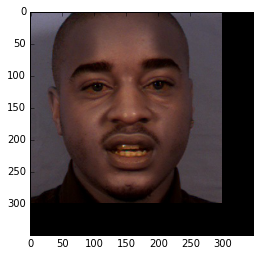

In [11]:
plt.imshow(constant)

In [4]:
label = labels.loc[labels['name'] == "i083qa-mn"].values.tolist()[0][2:]
label_reloaded = create_sets.recalculate_landmarks(im[1],label)

for i in range(0,151,2):
    cv2.circle(im[0], (int(label_reloaded[i]),int(label_reloaded[i+1]) ), 2, (255, 0, 0), -1)

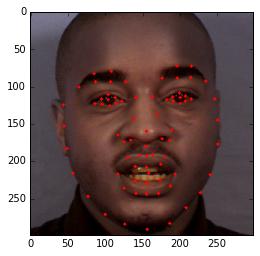

In [5]:
plt.imshow(im[0])

In [6]:
train_set = np.load("inceptionTrainBottleneck.npy")
train_labels = np.load("train_labels.npy")
test_set = np.load("inceptionTestBottleneck.npy")
test_labels = np.load("test_labels.npy")

In [20]:
from keras.layers import Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from keras.models import Sequential
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint 

tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0,  
          write_graph=True, write_images=True)

checkpointer = ModelCheckpoint(filepath='best.inception.hdf5', 
                               verbose=1, save_best_only=True)

model = Sequential()
model.add(Dense(1520,input_shape=train_set.shape[1:],kernel_initializer='uniform', activation='linear'))
model.add(Dense(152,kernel_initializer='uniform', activation='linear'))


model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1520)              1521520   
_________________________________________________________________
dense_12 (Dense)             (None, 152)               231192    
Total params: 1,752,712
Trainable params: 1,752,712
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model.fit(train_set, train_labels, validation_data=(test_set,test_labels), callbacks=[checkpointer,tbCallBack], epochs=10000, batch_size=100, verbose=0, shuffle=True)

Epoch 00000: val_loss did not improve
Epoch 00001: val_loss did not improve
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss did not improve
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss did not improve
Epoch 00016: val_loss did not improve
Epoch 00017: val_loss did not improve
Epoch 00018: val_loss did not improve
Epoch 00019: val_loss did not improve
Epoch 00020: val_loss did not improve
Epoch 00021: val_loss did not improve
Epoch 00022: val_loss did not improve
Epoch 00023: val_loss did not improve
Epoch 00024: val_loss did not improve
Epoch 00025: val_loss did not improve
Epoch 00026:

Epoch 00213: val_loss did not improve
Epoch 00214: val_loss did not improve
Epoch 00215: val_loss did not improve
Epoch 00216: val_loss did not improve
Epoch 00217: val_loss did not improve
Epoch 00218: val_loss did not improve
Epoch 00219: val_loss did not improve
Epoch 00220: val_loss did not improve
Epoch 00221: val_loss did not improve
Epoch 00222: val_loss did not improve
Epoch 00223: val_loss did not improve
Epoch 00224: val_loss did not improve
Epoch 00225: val_loss did not improve
Epoch 00226: val_loss did not improve
Epoch 00227: val_loss did not improve
Epoch 00228: val_loss did not improve
Epoch 00229: val_loss did not improve
Epoch 00230: val_loss did not improve
Epoch 00231: val_loss did not improve
Epoch 00232: val_loss did not improve
Epoch 00233: val_loss did not improve
Epoch 00234: val_loss did not improve
Epoch 00235: val_loss did not improve
Epoch 00236: val_loss did not improve
Epoch 00237: val_loss did not improve
Epoch 00238: val_loss did not improve
Epoch 00239:

Epoch 00428: val_loss did not improve
Epoch 00429: val_loss did not improve
Epoch 00430: val_loss did not improve
Epoch 00431: val_loss did not improve
Epoch 00432: val_loss did not improve
Epoch 00433: val_loss did not improve
Epoch 00434: val_loss did not improve
Epoch 00435: val_loss did not improve
Epoch 00436: val_loss did not improve
Epoch 00437: val_loss did not improve
Epoch 00438: val_loss did not improve
Epoch 00439: val_loss did not improve
Epoch 00440: val_loss did not improve
Epoch 00441: val_loss did not improve
Epoch 00442: val_loss did not improve
Epoch 00443: val_loss did not improve
Epoch 00444: val_loss did not improve
Epoch 00445: val_loss did not improve
Epoch 00446: val_loss did not improve
Epoch 00447: val_loss did not improve
Epoch 00448: val_loss did not improve
Epoch 00449: val_loss did not improve
Epoch 00450: val_loss did not improve
Epoch 00451: val_loss did not improve
Epoch 00452: val_loss did not improve
Epoch 00453: val_loss did not improve
Epoch 00454:

Epoch 00643: val_loss did not improve
Epoch 00644: val_loss did not improve
Epoch 00645: val_loss did not improve
Epoch 00646: val_loss did not improve
Epoch 00647: val_loss did not improve
Epoch 00648: val_loss did not improve
Epoch 00649: val_loss did not improve
Epoch 00650: val_loss did not improve
Epoch 00651: val_loss did not improve
Epoch 00652: val_loss did not improve
Epoch 00653: val_loss did not improve
Epoch 00654: val_loss did not improve
Epoch 00655: val_loss did not improve
Epoch 00656: val_loss did not improve
Epoch 00657: val_loss did not improve
Epoch 00658: val_loss did not improve
Epoch 00659: val_loss did not improve
Epoch 00660: val_loss did not improve
Epoch 00661: val_loss did not improve
Epoch 00662: val_loss did not improve
Epoch 00663: val_loss did not improve
Epoch 00664: val_loss did not improve
Epoch 00665: val_loss did not improve
Epoch 00666: val_loss did not improve
Epoch 00667: val_loss did not improve
Epoch 00668: val_loss did not improve
Epoch 00669:

Epoch 00859: val_loss did not improve
Epoch 00860: val_loss did not improve
Epoch 00861: val_loss did not improve
Epoch 00862: val_loss did not improve
Epoch 00863: val_loss did not improve
Epoch 00864: val_loss did not improve
Epoch 00865: val_loss did not improve
Epoch 00866: val_loss did not improve
Epoch 00867: val_loss did not improve
Epoch 00868: val_loss did not improve
Epoch 00869: val_loss did not improve
Epoch 00870: val_loss did not improve
Epoch 00871: val_loss did not improve
Epoch 00872: val_loss did not improve
Epoch 00873: val_loss did not improve
Epoch 00874: val_loss did not improve
Epoch 00875: val_loss did not improve
Epoch 00876: val_loss did not improve
Epoch 00877: val_loss did not improve
Epoch 00878: val_loss did not improve
Epoch 00879: val_loss did not improve
Epoch 00880: val_loss did not improve
Epoch 00881: val_loss did not improve
Epoch 00882: val_loss did not improve
Epoch 00883: val_loss did not improve
Epoch 00884: val_loss did not improve
Epoch 00885:

Epoch 01075: val_loss did not improve
Epoch 01076: val_loss did not improve
Epoch 01077: val_loss did not improve
Epoch 01078: val_loss did not improve
Epoch 01079: val_loss did not improve
Epoch 01080: val_loss did not improve
Epoch 01081: val_loss did not improve
Epoch 01082: val_loss did not improve
Epoch 01083: val_loss did not improve
Epoch 01084: val_loss did not improve
Epoch 01085: val_loss did not improve
Epoch 01086: val_loss did not improve
Epoch 01087: val_loss did not improve
Epoch 01088: val_loss did not improve
Epoch 01089: val_loss did not improve
Epoch 01090: val_loss did not improve
Epoch 01091: val_loss did not improve
Epoch 01092: val_loss did not improve
Epoch 01093: val_loss did not improve
Epoch 01094: val_loss did not improve
Epoch 01095: val_loss did not improve
Epoch 01096: val_loss did not improve
Epoch 01097: val_loss did not improve
Epoch 01098: val_loss did not improve
Epoch 01099: val_loss did not improve
Epoch 01100: val_loss did not improve
Epoch 01101:

Epoch 01291: val_loss did not improve
Epoch 01292: val_loss did not improve
Epoch 01293: val_loss did not improve
Epoch 01294: val_loss did not improve
Epoch 01295: val_loss did not improve
Epoch 01296: val_loss did not improve
Epoch 01297: val_loss did not improve
Epoch 01298: val_loss did not improve
Epoch 01299: val_loss did not improve
Epoch 01300: val_loss did not improve
Epoch 01301: val_loss did not improve
Epoch 01302: val_loss did not improve
Epoch 01303: val_loss did not improve
Epoch 01304: val_loss did not improve
Epoch 01305: val_loss did not improve
Epoch 01306: val_loss did not improve
Epoch 01307: val_loss did not improve
Epoch 01308: val_loss did not improve
Epoch 01309: val_loss did not improve
Epoch 01310: val_loss did not improve
Epoch 01311: val_loss did not improve
Epoch 01312: val_loss did not improve
Epoch 01313: val_loss did not improve
Epoch 01314: val_loss did not improve
Epoch 01315: val_loss did not improve
Epoch 01316: val_loss did not improve
Epoch 01317:

Epoch 01507: val_loss did not improve
Epoch 01508: val_loss did not improve
Epoch 01509: val_loss did not improve
Epoch 01510: val_loss did not improve
Epoch 01511: val_loss did not improve
Epoch 01512: val_loss did not improve
Epoch 01513: val_loss did not improve
Epoch 01514: val_loss did not improve
Epoch 01515: val_loss did not improve
Epoch 01516: val_loss did not improve
Epoch 01517: val_loss did not improve
Epoch 01518: val_loss did not improve
Epoch 01519: val_loss did not improve
Epoch 01520: val_loss did not improve
Epoch 01521: val_loss did not improve
Epoch 01522: val_loss did not improve
Epoch 01523: val_loss did not improve
Epoch 01524: val_loss did not improve
Epoch 01525: val_loss did not improve
Epoch 01526: val_loss did not improve
Epoch 01527: val_loss did not improve
Epoch 01528: val_loss did not improve
Epoch 01529: val_loss did not improve
Epoch 01530: val_loss did not improve
Epoch 01531: val_loss did not improve
Epoch 01532: val_loss did not improve
Epoch 01533:

Epoch 01723: val_loss did not improve
Epoch 01724: val_loss did not improve
Epoch 01725: val_loss did not improve
Epoch 01726: val_loss did not improve
Epoch 01727: val_loss did not improve
Epoch 01728: val_loss did not improve
Epoch 01729: val_loss did not improve
Epoch 01730: val_loss did not improve
Epoch 01731: val_loss did not improve
Epoch 01732: val_loss did not improve
Epoch 01733: val_loss did not improve
Epoch 01734: val_loss did not improve
Epoch 01735: val_loss did not improve
Epoch 01736: val_loss did not improve
Epoch 01737: val_loss did not improve
Epoch 01738: val_loss did not improve
Epoch 01739: val_loss did not improve
Epoch 01740: val_loss did not improve
Epoch 01741: val_loss did not improve
Epoch 01742: val_loss did not improve
Epoch 01743: val_loss did not improve
Epoch 01744: val_loss did not improve
Epoch 01745: val_loss did not improve
Epoch 01746: val_loss did not improve
Epoch 01747: val_loss did not improve
Epoch 01748: val_loss did not improve
Epoch 01749:

Epoch 01939: val_loss did not improve
Epoch 01940: val_loss did not improve
Epoch 01941: val_loss did not improve
Epoch 01942: val_loss did not improve
Epoch 01943: val_loss did not improve
Epoch 01944: val_loss did not improve
Epoch 01945: val_loss did not improve
Epoch 01946: val_loss did not improve
Epoch 01947: val_loss did not improve
Epoch 01948: val_loss did not improve
Epoch 01949: val_loss did not improve
Epoch 01950: val_loss did not improve
Epoch 01951: val_loss did not improve
Epoch 01952: val_loss did not improve
Epoch 01953: val_loss did not improve
Epoch 01954: val_loss did not improve
Epoch 01955: val_loss did not improve
Epoch 01956: val_loss did not improve
Epoch 01957: val_loss did not improve
Epoch 01958: val_loss did not improve
Epoch 01959: val_loss did not improve
Epoch 01960: val_loss did not improve
Epoch 01961: val_loss did not improve
Epoch 01962: val_loss did not improve
Epoch 01963: val_loss did not improve
Epoch 01964: val_loss did not improve
Epoch 01965:

Epoch 02155: val_loss did not improve
Epoch 02156: val_loss did not improve
Epoch 02157: val_loss did not improve
Epoch 02158: val_loss did not improve
Epoch 02159: val_loss did not improve
Epoch 02160: val_loss did not improve
Epoch 02161: val_loss did not improve
Epoch 02162: val_loss did not improve
Epoch 02163: val_loss did not improve
Epoch 02164: val_loss did not improve
Epoch 02165: val_loss did not improve
Epoch 02166: val_loss did not improve
Epoch 02167: val_loss did not improve
Epoch 02168: val_loss did not improve
Epoch 02169: val_loss did not improve
Epoch 02170: val_loss did not improve
Epoch 02171: val_loss did not improve
Epoch 02172: val_loss did not improve
Epoch 02173: val_loss did not improve
Epoch 02174: val_loss did not improve
Epoch 02175: val_loss did not improve
Epoch 02176: val_loss did not improve
Epoch 02177: val_loss did not improve
Epoch 02178: val_loss did not improve
Epoch 02179: val_loss did not improve
Epoch 02180: val_loss did not improve
Epoch 02181:

Epoch 02371: val_loss did not improve
Epoch 02372: val_loss did not improve
Epoch 02373: val_loss did not improve
Epoch 02374: val_loss did not improve
Epoch 02375: val_loss did not improve
Epoch 02376: val_loss did not improve
Epoch 02377: val_loss did not improve
Epoch 02378: val_loss did not improve
Epoch 02379: val_loss did not improve
Epoch 02380: val_loss did not improve
Epoch 02381: val_loss did not improve
Epoch 02382: val_loss did not improve
Epoch 02383: val_loss did not improve
Epoch 02384: val_loss did not improve
Epoch 02385: val_loss did not improve
Epoch 02386: val_loss did not improve
Epoch 02387: val_loss did not improve
Epoch 02388: val_loss did not improve
Epoch 02389: val_loss did not improve
Epoch 02390: val_loss did not improve
Epoch 02391: val_loss did not improve
Epoch 02392: val_loss did not improve
Epoch 02393: val_loss did not improve
Epoch 02394: val_loss did not improve
Epoch 02395: val_loss did not improve
Epoch 02396: val_loss did not improve
Epoch 02397:

Epoch 02587: val_loss did not improve
Epoch 02588: val_loss did not improve
Epoch 02589: val_loss did not improve
Epoch 02590: val_loss did not improve
Epoch 02591: val_loss did not improve
Epoch 02592: val_loss did not improve
Epoch 02593: val_loss did not improve
Epoch 02594: val_loss did not improve
Epoch 02595: val_loss did not improve
Epoch 02596: val_loss did not improve
Epoch 02597: val_loss did not improve
Epoch 02598: val_loss did not improve
Epoch 02599: val_loss did not improve
Epoch 02600: val_loss did not improve
Epoch 02601: val_loss did not improve
Epoch 02602: val_loss did not improve
Epoch 02603: val_loss did not improve
Epoch 02604: val_loss did not improve
Epoch 02605: val_loss did not improve
Epoch 02606: val_loss did not improve
Epoch 02607: val_loss did not improve
Epoch 02608: val_loss did not improve
Epoch 02609: val_loss did not improve
Epoch 02610: val_loss did not improve
Epoch 02611: val_loss did not improve
Epoch 02612: val_loss did not improve
Epoch 02613:

Epoch 02803: val_loss did not improve
Epoch 02804: val_loss did not improve
Epoch 02805: val_loss did not improve
Epoch 02806: val_loss did not improve
Epoch 02807: val_loss did not improve
Epoch 02808: val_loss did not improve
Epoch 02809: val_loss did not improve
Epoch 02810: val_loss did not improve
Epoch 02811: val_loss did not improve
Epoch 02812: val_loss did not improve
Epoch 02813: val_loss did not improve
Epoch 02814: val_loss did not improve
Epoch 02815: val_loss did not improve
Epoch 02816: val_loss did not improve
Epoch 02817: val_loss did not improve
Epoch 02818: val_loss did not improve
Epoch 02819: val_loss did not improve
Epoch 02820: val_loss did not improve
Epoch 02821: val_loss did not improve
Epoch 02822: val_loss did not improve
Epoch 02823: val_loss did not improve
Epoch 02824: val_loss did not improve
Epoch 02825: val_loss did not improve
Epoch 02826: val_loss did not improve
Epoch 02827: val_loss did not improve
Epoch 02828: val_loss did not improve
Epoch 02829:

Epoch 03019: val_loss did not improve
Epoch 03020: val_loss did not improve
Epoch 03021: val_loss did not improve
Epoch 03022: val_loss did not improve
Epoch 03023: val_loss did not improve
Epoch 03024: val_loss did not improve
Epoch 03025: val_loss did not improve
Epoch 03026: val_loss did not improve
Epoch 03027: val_loss did not improve
Epoch 03028: val_loss did not improve
Epoch 03029: val_loss did not improve
Epoch 03030: val_loss did not improve
Epoch 03031: val_loss did not improve
Epoch 03032: val_loss did not improve
Epoch 03033: val_loss did not improve
Epoch 03034: val_loss did not improve
Epoch 03035: val_loss did not improve
Epoch 03036: val_loss did not improve
Epoch 03037: val_loss did not improve
Epoch 03038: val_loss did not improve
Epoch 03039: val_loss did not improve
Epoch 03040: val_loss did not improve
Epoch 03041: val_loss did not improve
Epoch 03042: val_loss did not improve
Epoch 03043: val_loss did not improve
Epoch 03044: val_loss did not improve
Epoch 03045:

Epoch 03235: val_loss did not improve
Epoch 03236: val_loss did not improve
Epoch 03237: val_loss did not improve
Epoch 03238: val_loss did not improve
Epoch 03239: val_loss did not improve
Epoch 03240: val_loss did not improve
Epoch 03241: val_loss did not improve
Epoch 03242: val_loss did not improve
Epoch 03243: val_loss did not improve
Epoch 03244: val_loss did not improve
Epoch 03245: val_loss did not improve
Epoch 03246: val_loss did not improve
Epoch 03247: val_loss did not improve
Epoch 03248: val_loss did not improve
Epoch 03249: val_loss did not improve
Epoch 03250: val_loss did not improve
Epoch 03251: val_loss did not improve
Epoch 03252: val_loss did not improve
Epoch 03253: val_loss did not improve
Epoch 03254: val_loss did not improve
Epoch 03255: val_loss did not improve
Epoch 03256: val_loss did not improve
Epoch 03257: val_loss did not improve
Epoch 03258: val_loss did not improve
Epoch 03259: val_loss did not improve
Epoch 03260: val_loss did not improve
Epoch 03261:

Epoch 03451: val_loss did not improve
Epoch 03452: val_loss did not improve
Epoch 03453: val_loss did not improve
Epoch 03454: val_loss did not improve
Epoch 03455: val_loss did not improve
Epoch 03456: val_loss did not improve
Epoch 03457: val_loss did not improve
Epoch 03458: val_loss did not improve
Epoch 03459: val_loss did not improve
Epoch 03460: val_loss did not improve
Epoch 03461: val_loss did not improve
Epoch 03462: val_loss did not improve
Epoch 03463: val_loss did not improve
Epoch 03464: val_loss did not improve
Epoch 03465: val_loss did not improve
Epoch 03466: val_loss did not improve
Epoch 03467: val_loss did not improve
Epoch 03468: val_loss did not improve
Epoch 03469: val_loss did not improve
Epoch 03470: val_loss did not improve
Epoch 03471: val_loss did not improve
Epoch 03472: val_loss did not improve
Epoch 03473: val_loss did not improve
Epoch 03474: val_loss did not improve
Epoch 03475: val_loss did not improve
Epoch 03476: val_loss did not improve
Epoch 03477:

Epoch 03667: val_loss did not improve
Epoch 03668: val_loss did not improve
Epoch 03669: val_loss did not improve
Epoch 03670: val_loss did not improve
Epoch 03671: val_loss did not improve
Epoch 03672: val_loss did not improve
Epoch 03673: val_loss did not improve
Epoch 03674: val_loss did not improve
Epoch 03675: val_loss did not improve
Epoch 03676: val_loss did not improve
Epoch 03677: val_loss did not improve
Epoch 03678: val_loss did not improve
Epoch 03679: val_loss did not improve
Epoch 03680: val_loss did not improve
Epoch 03681: val_loss did not improve
Epoch 03682: val_loss did not improve
Epoch 03683: val_loss did not improve
Epoch 03684: val_loss did not improve
Epoch 03685: val_loss did not improve
Epoch 03686: val_loss did not improve
Epoch 03687: val_loss did not improve
Epoch 03688: val_loss did not improve
Epoch 03689: val_loss did not improve
Epoch 03690: val_loss did not improve
Epoch 03691: val_loss did not improve
Epoch 03692: val_loss did not improve
Epoch 03693:

Epoch 03883: val_loss did not improve
Epoch 03884: val_loss did not improve
Epoch 03885: val_loss did not improve
Epoch 03886: val_loss did not improve
Epoch 03887: val_loss did not improve
Epoch 03888: val_loss did not improve
Epoch 03889: val_loss did not improve
Epoch 03890: val_loss did not improve
Epoch 03891: val_loss did not improve
Epoch 03892: val_loss did not improve
Epoch 03893: val_loss did not improve
Epoch 03894: val_loss did not improve
Epoch 03895: val_loss did not improve
Epoch 03896: val_loss did not improve
Epoch 03897: val_loss did not improve
Epoch 03898: val_loss did not improve
Epoch 03899: val_loss did not improve
Epoch 03900: val_loss did not improve
Epoch 03901: val_loss did not improve
Epoch 03902: val_loss did not improve
Epoch 03903: val_loss did not improve
Epoch 03904: val_loss did not improve
Epoch 03905: val_loss did not improve
Epoch 03906: val_loss did not improve
Epoch 03907: val_loss did not improve
Epoch 03908: val_loss did not improve
Epoch 03909:

Epoch 04099: val_loss did not improve
Epoch 04100: val_loss did not improve
Epoch 04101: val_loss did not improve
Epoch 04102: val_loss did not improve
Epoch 04103: val_loss did not improve
Epoch 04104: val_loss did not improve
Epoch 04105: val_loss did not improve
Epoch 04106: val_loss did not improve
Epoch 04107: val_loss did not improve
Epoch 04108: val_loss did not improve
Epoch 04109: val_loss did not improve
Epoch 04110: val_loss did not improve
Epoch 04111: val_loss did not improve
Epoch 04112: val_loss did not improve
Epoch 04113: val_loss did not improve
Epoch 04114: val_loss did not improve
Epoch 04115: val_loss did not improve
Epoch 04116: val_loss did not improve
Epoch 04117: val_loss did not improve
Epoch 04118: val_loss did not improve
Epoch 04119: val_loss did not improve
Epoch 04120: val_loss did not improve
Epoch 04121: val_loss did not improve
Epoch 04122: val_loss did not improve
Epoch 04123: val_loss did not improve
Epoch 04124: val_loss did not improve
Epoch 04125:

Epoch 04315: val_loss did not improve
Epoch 04316: val_loss did not improve
Epoch 04317: val_loss did not improve
Epoch 04318: val_loss did not improve
Epoch 04319: val_loss did not improve
Epoch 04320: val_loss did not improve
Epoch 04321: val_loss did not improve
Epoch 04322: val_loss did not improve
Epoch 04323: val_loss did not improve
Epoch 04324: val_loss did not improve
Epoch 04325: val_loss did not improve
Epoch 04326: val_loss did not improve
Epoch 04327: val_loss did not improve
Epoch 04328: val_loss did not improve
Epoch 04329: val_loss did not improve
Epoch 04330: val_loss did not improve
Epoch 04331: val_loss did not improve
Epoch 04332: val_loss did not improve
Epoch 04333: val_loss did not improve
Epoch 04334: val_loss did not improve
Epoch 04335: val_loss did not improve
Epoch 04336: val_loss did not improve
Epoch 04337: val_loss did not improve
Epoch 04338: val_loss did not improve
Epoch 04339: val_loss did not improve
Epoch 04340: val_loss did not improve
Epoch 04341:

Epoch 04531: val_loss did not improve
Epoch 04532: val_loss did not improve
Epoch 04533: val_loss did not improve
Epoch 04534: val_loss did not improve
Epoch 04535: val_loss did not improve
Epoch 04536: val_loss did not improve
Epoch 04537: val_loss did not improve
Epoch 04538: val_loss did not improve
Epoch 04539: val_loss did not improve
Epoch 04540: val_loss did not improve
Epoch 04541: val_loss did not improve
Epoch 04542: val_loss did not improve
Epoch 04543: val_loss did not improve
Epoch 04544: val_loss did not improve
Epoch 04545: val_loss did not improve
Epoch 04546: val_loss did not improve
Epoch 04547: val_loss did not improve
Epoch 04548: val_loss did not improve
Epoch 04549: val_loss did not improve
Epoch 04550: val_loss did not improve
Epoch 04551: val_loss did not improve
Epoch 04552: val_loss did not improve
Epoch 04553: val_loss did not improve
Epoch 04554: val_loss did not improve
Epoch 04555: val_loss did not improve
Epoch 04556: val_loss did not improve
Epoch 04557:

Epoch 04747: val_loss did not improve
Epoch 04748: val_loss did not improve
Epoch 04749: val_loss did not improve
Epoch 04750: val_loss did not improve
Epoch 04751: val_loss did not improve
Epoch 04752: val_loss did not improve
Epoch 04753: val_loss did not improve
Epoch 04754: val_loss did not improve
Epoch 04755: val_loss did not improve
Epoch 04756: val_loss did not improve
Epoch 04757: val_loss did not improve
Epoch 04758: val_loss did not improve
Epoch 04759: val_loss did not improve
Epoch 04760: val_loss did not improve
Epoch 04761: val_loss did not improve
Epoch 04762: val_loss did not improve
Epoch 04763: val_loss did not improve
Epoch 04764: val_loss did not improve
Epoch 04765: val_loss did not improve
Epoch 04766: val_loss did not improve
Epoch 04767: val_loss did not improve
Epoch 04768: val_loss did not improve
Epoch 04769: val_loss did not improve
Epoch 04770: val_loss did not improve
Epoch 04771: val_loss did not improve
Epoch 04772: val_loss did not improve
Epoch 04773:

Epoch 04963: val_loss did not improve
Epoch 04964: val_loss did not improve
Epoch 04965: val_loss did not improve
Epoch 04966: val_loss did not improve
Epoch 04967: val_loss did not improve
Epoch 04968: val_loss did not improve
Epoch 04969: val_loss did not improve
Epoch 04970: val_loss did not improve
Epoch 04971: val_loss did not improve
Epoch 04972: val_loss did not improve
Epoch 04973: val_loss did not improve
Epoch 04974: val_loss did not improve
Epoch 04975: val_loss did not improve
Epoch 04976: val_loss did not improve
Epoch 04977: val_loss did not improve
Epoch 04978: val_loss did not improve
Epoch 04979: val_loss did not improve
Epoch 04980: val_loss did not improve
Epoch 04981: val_loss did not improve
Epoch 04982: val_loss did not improve
Epoch 04983: val_loss did not improve
Epoch 04984: val_loss did not improve
Epoch 04985: val_loss did not improve
Epoch 04986: val_loss did not improve
Epoch 04987: val_loss did not improve
Epoch 04988: val_loss did not improve
Epoch 04989:

Epoch 05179: val_loss did not improve
Epoch 05180: val_loss did not improve
Epoch 05181: val_loss did not improve
Epoch 05182: val_loss did not improve
Epoch 05183: val_loss did not improve
Epoch 05184: val_loss did not improve
Epoch 05185: val_loss did not improve
Epoch 05186: val_loss did not improve
Epoch 05187: val_loss did not improve
Epoch 05188: val_loss did not improve
Epoch 05189: val_loss did not improve
Epoch 05190: val_loss did not improve
Epoch 05191: val_loss did not improve
Epoch 05192: val_loss did not improve
Epoch 05193: val_loss did not improve
Epoch 05194: val_loss did not improve
Epoch 05195: val_loss did not improve
Epoch 05196: val_loss did not improve
Epoch 05197: val_loss did not improve
Epoch 05198: val_loss did not improve
Epoch 05199: val_loss did not improve
Epoch 05200: val_loss did not improve
Epoch 05201: val_loss did not improve
Epoch 05202: val_loss did not improve
Epoch 05203: val_loss did not improve
Epoch 05204: val_loss did not improve
Epoch 05205:

Epoch 05395: val_loss did not improve
Epoch 05396: val_loss did not improve
Epoch 05397: val_loss did not improve
Epoch 05398: val_loss did not improve
Epoch 05399: val_loss did not improve
Epoch 05400: val_loss did not improve
Epoch 05401: val_loss did not improve
Epoch 05402: val_loss did not improve
Epoch 05403: val_loss did not improve
Epoch 05404: val_loss did not improve
Epoch 05405: val_loss did not improve
Epoch 05406: val_loss did not improve
Epoch 05407: val_loss did not improve
Epoch 05408: val_loss did not improve
Epoch 05409: val_loss did not improve
Epoch 05410: val_loss did not improve
Epoch 05411: val_loss did not improve
Epoch 05412: val_loss did not improve
Epoch 05413: val_loss did not improve
Epoch 05414: val_loss did not improve
Epoch 05415: val_loss did not improve
Epoch 05416: val_loss did not improve
Epoch 05417: val_loss did not improve
Epoch 05418: val_loss did not improve
Epoch 05419: val_loss did not improve
Epoch 05420: val_loss did not improve
Epoch 05421:

Epoch 05611: val_loss did not improve
Epoch 05612: val_loss did not improve
Epoch 05613: val_loss did not improve
Epoch 05614: val_loss did not improve
Epoch 05615: val_loss did not improve
Epoch 05616: val_loss did not improve
Epoch 05617: val_loss did not improve
Epoch 05618: val_loss did not improve
Epoch 05619: val_loss did not improve
Epoch 05620: val_loss did not improve
Epoch 05621: val_loss did not improve
Epoch 05622: val_loss did not improve
Epoch 05623: val_loss did not improve
Epoch 05624: val_loss did not improve
Epoch 05625: val_loss did not improve
Epoch 05626: val_loss did not improve
Epoch 05627: val_loss did not improve
Epoch 05628: val_loss did not improve
Epoch 05629: val_loss did not improve
Epoch 05630: val_loss did not improve
Epoch 05631: val_loss did not improve
Epoch 05632: val_loss did not improve
Epoch 05633: val_loss did not improve
Epoch 05634: val_loss did not improve
Epoch 05635: val_loss did not improve
Epoch 05636: val_loss did not improve
Epoch 05637:

Epoch 05827: val_loss did not improve
Epoch 05828: val_loss did not improve
Epoch 05829: val_loss did not improve
Epoch 05830: val_loss did not improve
Epoch 05831: val_loss did not improve
Epoch 05832: val_loss did not improve
Epoch 05833: val_loss did not improve
Epoch 05834: val_loss did not improve
Epoch 05835: val_loss did not improve
Epoch 05836: val_loss did not improve
Epoch 05837: val_loss did not improve
Epoch 05838: val_loss did not improve
Epoch 05839: val_loss did not improve
Epoch 05840: val_loss did not improve
Epoch 05841: val_loss did not improve
Epoch 05842: val_loss did not improve
Epoch 05843: val_loss did not improve
Epoch 05844: val_loss did not improve
Epoch 05845: val_loss did not improve
Epoch 05846: val_loss did not improve
Epoch 05847: val_loss did not improve
Epoch 05848: val_loss did not improve
Epoch 05849: val_loss did not improve
Epoch 05850: val_loss did not improve
Epoch 05851: val_loss did not improve
Epoch 05852: val_loss did not improve
Epoch 05853:

Epoch 06043: val_loss did not improve
Epoch 06044: val_loss did not improve
Epoch 06045: val_loss did not improve
Epoch 06046: val_loss did not improve
Epoch 06047: val_loss did not improve
Epoch 06048: val_loss did not improve
Epoch 06049: val_loss did not improve
Epoch 06050: val_loss did not improve
Epoch 06051: val_loss did not improve
Epoch 06052: val_loss did not improve
Epoch 06053: val_loss did not improve
Epoch 06054: val_loss did not improve
Epoch 06055: val_loss did not improve
Epoch 06056: val_loss did not improve
Epoch 06057: val_loss did not improve
Epoch 06058: val_loss did not improve
Epoch 06059: val_loss did not improve
Epoch 06060: val_loss did not improve
Epoch 06061: val_loss did not improve
Epoch 06062: val_loss did not improve
Epoch 06063: val_loss did not improve
Epoch 06064: val_loss did not improve
Epoch 06065: val_loss did not improve
Epoch 06066: val_loss did not improve
Epoch 06067: val_loss did not improve
Epoch 06068: val_loss did not improve
Epoch 06069:

Epoch 06259: val_loss did not improve
Epoch 06260: val_loss did not improve
Epoch 06261: val_loss did not improve
Epoch 06262: val_loss did not improve
Epoch 06263: val_loss did not improve
Epoch 06264: val_loss did not improve
Epoch 06265: val_loss did not improve
Epoch 06266: val_loss did not improve
Epoch 06267: val_loss did not improve
Epoch 06268: val_loss did not improve
Epoch 06269: val_loss did not improve
Epoch 06270: val_loss did not improve
Epoch 06271: val_loss did not improve
Epoch 06272: val_loss did not improve
Epoch 06273: val_loss did not improve
Epoch 06274: val_loss did not improve
Epoch 06275: val_loss did not improve
Epoch 06276: val_loss did not improve
Epoch 06277: val_loss did not improve
Epoch 06278: val_loss did not improve
Epoch 06279: val_loss did not improve
Epoch 06280: val_loss did not improve
Epoch 06281: val_loss did not improve
Epoch 06282: val_loss did not improve
Epoch 06283: val_loss did not improve
Epoch 06284: val_loss did not improve
Epoch 06285:

Epoch 06475: val_loss did not improve
Epoch 06476: val_loss did not improve
Epoch 06477: val_loss did not improve
Epoch 06478: val_loss did not improve
Epoch 06479: val_loss did not improve
Epoch 06480: val_loss did not improve
Epoch 06481: val_loss did not improve
Epoch 06482: val_loss did not improve
Epoch 06483: val_loss did not improve
Epoch 06484: val_loss did not improve
Epoch 06485: val_loss did not improve
Epoch 06486: val_loss did not improve
Epoch 06487: val_loss did not improve
Epoch 06488: val_loss did not improve
Epoch 06489: val_loss did not improve
Epoch 06490: val_loss did not improve
Epoch 06491: val_loss did not improve
Epoch 06492: val_loss did not improve
Epoch 06493: val_loss did not improve
Epoch 06494: val_loss did not improve
Epoch 06495: val_loss did not improve
Epoch 06496: val_loss did not improve
Epoch 06497: val_loss did not improve
Epoch 06498: val_loss did not improve
Epoch 06499: val_loss did not improve
Epoch 06500: val_loss did not improve
Epoch 06501:

Epoch 06691: val_loss did not improve
Epoch 06692: val_loss did not improve
Epoch 06693: val_loss did not improve
Epoch 06694: val_loss did not improve
Epoch 06695: val_loss did not improve
Epoch 06696: val_loss did not improve
Epoch 06697: val_loss did not improve
Epoch 06698: val_loss did not improve
Epoch 06699: val_loss did not improve
Epoch 06700: val_loss did not improve
Epoch 06701: val_loss did not improve
Epoch 06702: val_loss did not improve
Epoch 06703: val_loss did not improve
Epoch 06704: val_loss did not improve
Epoch 06705: val_loss did not improve
Epoch 06706: val_loss did not improve
Epoch 06707: val_loss did not improve
Epoch 06708: val_loss did not improve
Epoch 06709: val_loss did not improve
Epoch 06710: val_loss did not improve
Epoch 06711: val_loss did not improve
Epoch 06712: val_loss did not improve
Epoch 06713: val_loss did not improve
Epoch 06714: val_loss did not improve
Epoch 06715: val_loss did not improve
Epoch 06716: val_loss did not improve
Epoch 06717:

Epoch 06907: val_loss did not improve
Epoch 06908: val_loss did not improve
Epoch 06909: val_loss did not improve
Epoch 06910: val_loss did not improve
Epoch 06911: val_loss did not improve
Epoch 06912: val_loss did not improve
Epoch 06913: val_loss did not improve
Epoch 06914: val_loss did not improve
Epoch 06915: val_loss did not improve
Epoch 06916: val_loss did not improve
Epoch 06917: val_loss did not improve
Epoch 06918: val_loss did not improve
Epoch 06919: val_loss did not improve
Epoch 06920: val_loss did not improve
Epoch 06921: val_loss did not improve
Epoch 06922: val_loss did not improve
Epoch 06923: val_loss did not improve
Epoch 06924: val_loss did not improve
Epoch 06925: val_loss did not improve
Epoch 06926: val_loss did not improve
Epoch 06927: val_loss did not improve
Epoch 06928: val_loss did not improve
Epoch 06929: val_loss did not improve
Epoch 06930: val_loss did not improve
Epoch 06931: val_loss did not improve
Epoch 06932: val_loss did not improve
Epoch 06933:

Epoch 07123: val_loss did not improve
Epoch 07124: val_loss did not improve
Epoch 07125: val_loss did not improve
Epoch 07126: val_loss did not improve
Epoch 07127: val_loss did not improve
Epoch 07128: val_loss did not improve
Epoch 07129: val_loss did not improve
Epoch 07130: val_loss did not improve
Epoch 07131: val_loss did not improve
Epoch 07132: val_loss did not improve
Epoch 07133: val_loss did not improve
Epoch 07134: val_loss did not improve
Epoch 07135: val_loss did not improve
Epoch 07136: val_loss did not improve
Epoch 07137: val_loss did not improve
Epoch 07138: val_loss did not improve
Epoch 07139: val_loss did not improve
Epoch 07140: val_loss did not improve
Epoch 07141: val_loss did not improve
Epoch 07142: val_loss did not improve
Epoch 07143: val_loss did not improve
Epoch 07144: val_loss did not improve
Epoch 07145: val_loss did not improve
Epoch 07146: val_loss did not improve
Epoch 07147: val_loss did not improve
Epoch 07148: val_loss did not improve
Epoch 07149:

Epoch 07339: val_loss did not improve
Epoch 07340: val_loss did not improve
Epoch 07341: val_loss did not improve
Epoch 07342: val_loss did not improve
Epoch 07343: val_loss did not improve
Epoch 07344: val_loss did not improve
Epoch 07345: val_loss did not improve
Epoch 07346: val_loss did not improve
Epoch 07347: val_loss did not improve
Epoch 07348: val_loss did not improve
Epoch 07349: val_loss did not improve
Epoch 07350: val_loss did not improve
Epoch 07351: val_loss did not improve
Epoch 07352: val_loss did not improve
Epoch 07353: val_loss did not improve
Epoch 07354: val_loss did not improve
Epoch 07355: val_loss did not improve
Epoch 07356: val_loss did not improve
Epoch 07357: val_loss did not improve
Epoch 07358: val_loss did not improve
Epoch 07359: val_loss did not improve
Epoch 07360: val_loss did not improve
Epoch 07361: val_loss did not improve
Epoch 07362: val_loss did not improve
Epoch 07363: val_loss did not improve
Epoch 07364: val_loss did not improve
Epoch 07365:

Epoch 07555: val_loss did not improve
Epoch 07556: val_loss did not improve
Epoch 07557: val_loss did not improve
Epoch 07558: val_loss did not improve
Epoch 07559: val_loss did not improve
Epoch 07560: val_loss did not improve
Epoch 07561: val_loss did not improve
Epoch 07562: val_loss did not improve
Epoch 07563: val_loss did not improve
Epoch 07564: val_loss did not improve
Epoch 07565: val_loss did not improve
Epoch 07566: val_loss did not improve
Epoch 07567: val_loss did not improve
Epoch 07568: val_loss did not improve
Epoch 07569: val_loss did not improve
Epoch 07570: val_loss did not improve
Epoch 07571: val_loss did not improve
Epoch 07572: val_loss did not improve
Epoch 07573: val_loss did not improve
Epoch 07574: val_loss did not improve
Epoch 07575: val_loss did not improve
Epoch 07576: val_loss did not improve
Epoch 07577: val_loss did not improve
Epoch 07578: val_loss did not improve
Epoch 07579: val_loss did not improve
Epoch 07580: val_loss did not improve
Epoch 07581:

Epoch 07771: val_loss did not improve
Epoch 07772: val_loss did not improve
Epoch 07773: val_loss did not improve
Epoch 07774: val_loss did not improve
Epoch 07775: val_loss did not improve
Epoch 07776: val_loss did not improve
Epoch 07777: val_loss did not improve
Epoch 07778: val_loss did not improve
Epoch 07779: val_loss did not improve
Epoch 07780: val_loss did not improve
Epoch 07781: val_loss did not improve
Epoch 07782: val_loss did not improve
Epoch 07783: val_loss did not improve
Epoch 07784: val_loss did not improve
Epoch 07785: val_loss did not improve
Epoch 07786: val_loss did not improve
Epoch 07787: val_loss did not improve
Epoch 07788: val_loss did not improve
Epoch 07789: val_loss did not improve
Epoch 07790: val_loss did not improve
Epoch 07791: val_loss did not improve
Epoch 07792: val_loss did not improve
Epoch 07793: val_loss did not improve
Epoch 07794: val_loss did not improve
Epoch 07795: val_loss did not improve
Epoch 07796: val_loss did not improve
Epoch 07797:

Epoch 07987: val_loss did not improve
Epoch 07988: val_loss did not improve
Epoch 07989: val_loss did not improve
Epoch 07990: val_loss did not improve
Epoch 07991: val_loss did not improve
Epoch 07992: val_loss did not improve
Epoch 07993: val_loss did not improve
Epoch 07994: val_loss did not improve
Epoch 07995: val_loss did not improve
Epoch 07996: val_loss did not improve
Epoch 07997: val_loss did not improve
Epoch 07998: val_loss did not improve
Epoch 07999: val_loss did not improve
Epoch 08000: val_loss did not improve
Epoch 08001: val_loss did not improve
Epoch 08002: val_loss did not improve
Epoch 08003: val_loss did not improve
Epoch 08004: val_loss did not improve
Epoch 08005: val_loss did not improve
Epoch 08006: val_loss did not improve
Epoch 08007: val_loss did not improve
Epoch 08008: val_loss did not improve
Epoch 08009: val_loss did not improve
Epoch 08010: val_loss did not improve
Epoch 08011: val_loss did not improve
Epoch 08012: val_loss did not improve
Epoch 08013:

Epoch 08203: val_loss did not improve
Epoch 08204: val_loss did not improve
Epoch 08205: val_loss did not improve
Epoch 08206: val_loss did not improve
Epoch 08207: val_loss did not improve
Epoch 08208: val_loss did not improve
Epoch 08209: val_loss did not improve
Epoch 08210: val_loss did not improve
Epoch 08211: val_loss did not improve
Epoch 08212: val_loss did not improve
Epoch 08213: val_loss did not improve
Epoch 08214: val_loss did not improve
Epoch 08215: val_loss did not improve
Epoch 08216: val_loss did not improve
Epoch 08217: val_loss did not improve
Epoch 08218: val_loss did not improve
Epoch 08219: val_loss did not improve
Epoch 08220: val_loss did not improve
Epoch 08221: val_loss did not improve
Epoch 08222: val_loss did not improve
Epoch 08223: val_loss did not improve
Epoch 08224: val_loss did not improve
Epoch 08225: val_loss did not improve
Epoch 08226: val_loss did not improve
Epoch 08227: val_loss did not improve
Epoch 08228: val_loss did not improve
Epoch 08229:

Epoch 08419: val_loss did not improve
Epoch 08420: val_loss did not improve
Epoch 08421: val_loss did not improve
Epoch 08422: val_loss did not improve
Epoch 08423: val_loss did not improve
Epoch 08424: val_loss did not improve
Epoch 08425: val_loss did not improve
Epoch 08426: val_loss did not improve
Epoch 08427: val_loss did not improve
Epoch 08428: val_loss did not improve
Epoch 08429: val_loss did not improve
Epoch 08430: val_loss did not improve
Epoch 08431: val_loss did not improve
Epoch 08432: val_loss did not improve
Epoch 08433: val_loss did not improve
Epoch 08434: val_loss did not improve
Epoch 08435: val_loss did not improve
Epoch 08436: val_loss did not improve
Epoch 08437: val_loss did not improve
Epoch 08438: val_loss did not improve
Epoch 08439: val_loss did not improve
Epoch 08440: val_loss did not improve
Epoch 08441: val_loss did not improve
Epoch 08442: val_loss did not improve
Epoch 08443: val_loss did not improve
Epoch 08444: val_loss did not improve
Epoch 08445:

Epoch 08635: val_loss did not improve
Epoch 08636: val_loss did not improve
Epoch 08637: val_loss did not improve
Epoch 08638: val_loss did not improve
Epoch 08639: val_loss did not improve
Epoch 08640: val_loss did not improve
Epoch 08641: val_loss did not improve
Epoch 08642: val_loss did not improve
Epoch 08643: val_loss did not improve
Epoch 08644: val_loss did not improve
Epoch 08645: val_loss did not improve
Epoch 08646: val_loss did not improve
Epoch 08647: val_loss did not improve
Epoch 08648: val_loss did not improve
Epoch 08649: val_loss did not improve
Epoch 08650: val_loss did not improve
Epoch 08651: val_loss did not improve
Epoch 08652: val_loss did not improve
Epoch 08653: val_loss did not improve
Epoch 08654: val_loss did not improve
Epoch 08655: val_loss did not improve
Epoch 08656: val_loss did not improve
Epoch 08657: val_loss did not improve
Epoch 08658: val_loss did not improve
Epoch 08659: val_loss did not improve
Epoch 08660: val_loss did not improve
Epoch 08661:

Epoch 08851: val_loss did not improve
Epoch 08852: val_loss did not improve
Epoch 08853: val_loss did not improve
Epoch 08854: val_loss did not improve
Epoch 08855: val_loss did not improve
Epoch 08856: val_loss did not improve
Epoch 08857: val_loss did not improve
Epoch 08858: val_loss did not improve
Epoch 08859: val_loss did not improve
Epoch 08860: val_loss did not improve
Epoch 08861: val_loss did not improve
Epoch 08862: val_loss did not improve
Epoch 08863: val_loss did not improve
Epoch 08864: val_loss did not improve
Epoch 08865: val_loss did not improve
Epoch 08866: val_loss did not improve
Epoch 08867: val_loss did not improve
Epoch 08868: val_loss did not improve
Epoch 08869: val_loss did not improve
Epoch 08870: val_loss did not improve
Epoch 08871: val_loss did not improve
Epoch 08872: val_loss did not improve
Epoch 08873: val_loss did not improve
Epoch 08874: val_loss did not improve
Epoch 08875: val_loss did not improve
Epoch 08876: val_loss did not improve
Epoch 08877:

Epoch 09067: val_loss did not improve
Epoch 09068: val_loss did not improve
Epoch 09069: val_loss did not improve
Epoch 09070: val_loss did not improve
Epoch 09071: val_loss did not improve
Epoch 09072: val_loss did not improve
Epoch 09073: val_loss did not improve
Epoch 09074: val_loss did not improve
Epoch 09075: val_loss did not improve
Epoch 09076: val_loss did not improve
Epoch 09077: val_loss did not improve
Epoch 09078: val_loss did not improve
Epoch 09079: val_loss did not improve
Epoch 09080: val_loss did not improve
Epoch 09081: val_loss did not improve
Epoch 09082: val_loss did not improve
Epoch 09083: val_loss did not improve
Epoch 09084: val_loss did not improve
Epoch 09085: val_loss did not improve
Epoch 09086: val_loss did not improve
Epoch 09087: val_loss did not improve
Epoch 09088: val_loss did not improve
Epoch 09089: val_loss did not improve
Epoch 09090: val_loss did not improve
Epoch 09091: val_loss did not improve
Epoch 09092: val_loss did not improve
Epoch 09093:

Epoch 09283: val_loss did not improve
Epoch 09284: val_loss did not improve
Epoch 09285: val_loss did not improve
Epoch 09286: val_loss did not improve
Epoch 09287: val_loss did not improve
Epoch 09288: val_loss did not improve
Epoch 09289: val_loss did not improve
Epoch 09290: val_loss did not improve
Epoch 09291: val_loss did not improve
Epoch 09292: val_loss did not improve
Epoch 09293: val_loss did not improve
Epoch 09294: val_loss did not improve
Epoch 09295: val_loss did not improve
Epoch 09296: val_loss did not improve
Epoch 09297: val_loss did not improve
Epoch 09298: val_loss did not improve
Epoch 09299: val_loss did not improve
Epoch 09300: val_loss did not improve
Epoch 09301: val_loss did not improve
Epoch 09302: val_loss did not improve
Epoch 09303: val_loss did not improve
Epoch 09304: val_loss did not improve
Epoch 09305: val_loss did not improve
Epoch 09306: val_loss did not improve
Epoch 09307: val_loss did not improve
Epoch 09308: val_loss did not improve
Epoch 09309:

Epoch 09499: val_loss did not improve
Epoch 09500: val_loss did not improve
Epoch 09501: val_loss did not improve
Epoch 09502: val_loss did not improve
Epoch 09503: val_loss did not improve
Epoch 09504: val_loss did not improve
Epoch 09505: val_loss did not improve
Epoch 09506: val_loss did not improve
Epoch 09507: val_loss did not improve
Epoch 09508: val_loss did not improve
Epoch 09509: val_loss did not improve
Epoch 09510: val_loss did not improve
Epoch 09511: val_loss did not improve
Epoch 09512: val_loss did not improve
Epoch 09513: val_loss did not improve
Epoch 09514: val_loss did not improve
Epoch 09515: val_loss did not improve
Epoch 09516: val_loss did not improve
Epoch 09517: val_loss did not improve
Epoch 09518: val_loss did not improve
Epoch 09519: val_loss did not improve
Epoch 09520: val_loss did not improve
Epoch 09521: val_loss did not improve
Epoch 09522: val_loss did not improve
Epoch 09523: val_loss did not improve
Epoch 09524: val_loss did not improve
Epoch 09525:

Epoch 09715: val_loss did not improve
Epoch 09716: val_loss did not improve
Epoch 09717: val_loss did not improve
Epoch 09718: val_loss did not improve
Epoch 09719: val_loss did not improve
Epoch 09720: val_loss did not improve
Epoch 09721: val_loss did not improve
Epoch 09722: val_loss did not improve
Epoch 09723: val_loss did not improve
Epoch 09724: val_loss did not improve
Epoch 09725: val_loss did not improve
Epoch 09726: val_loss did not improve
Epoch 09727: val_loss did not improve
Epoch 09728: val_loss did not improve
Epoch 09729: val_loss did not improve
Epoch 09730: val_loss did not improve
Epoch 09731: val_loss did not improve
Epoch 09732: val_loss did not improve
Epoch 09733: val_loss did not improve
Epoch 09734: val_loss did not improve
Epoch 09735: val_loss did not improve
Epoch 09736: val_loss did not improve
Epoch 09737: val_loss did not improve
Epoch 09738: val_loss did not improve
Epoch 09739: val_loss did not improve
Epoch 09740: val_loss did not improve
Epoch 09741:

Epoch 09931: val_loss did not improve
Epoch 09932: val_loss did not improve
Epoch 09933: val_loss did not improve
Epoch 09934: val_loss did not improve
Epoch 09935: val_loss did not improve
Epoch 09936: val_loss did not improve
Epoch 09937: val_loss did not improve
Epoch 09938: val_loss did not improve
Epoch 09939: val_loss did not improve
Epoch 09940: val_loss did not improve
Epoch 09941: val_loss did not improve
Epoch 09942: val_loss did not improve
Epoch 09943: val_loss did not improve
Epoch 09944: val_loss did not improve
Epoch 09945: val_loss did not improve
Epoch 09946: val_loss did not improve
Epoch 09947: val_loss did not improve
Epoch 09948: val_loss did not improve
Epoch 09949: val_loss did not improve
Epoch 09950: val_loss did not improve
Epoch 09951: val_loss did not improve
Epoch 09952: val_loss did not improve
Epoch 09953: val_loss did not improve
Epoch 09954: val_loss did not improve
Epoch 09955: val_loss did not improve
Epoch 09956: val_loss did not improve
Epoch 09957:

In [29]:
model.load_weights("best.inception.hdf5")

In [30]:
from keras.applications.inception_v3 import InceptionV3

In [31]:
incep = InceptionV3(weights='imagenet')

[[  73.29933167  150.49674988   73.10140228  151.07252502   75.37213898
   150.59983826   80.89492035  150.41072083   92.95765686  150.46125793
   108.83520508  150.16314697  129.17980957  149.21742249  152.22280884
   148.82009888  173.86636353  149.07606506  189.46295166  149.62001038
   201.63699341  149.76481628  210.20420837  149.84764099  216.06895447
   150.10952759  218.68484497  150.3838501   217.41844177  150.30117798
   179.97398376  155.47845459  194.55015564  151.62081909  181.15499878
   150.56466675  167.73194885  150.33079529  182.09950256  150.53149414
   194.19021606  151.5637207    93.69730377  150.80375671  107.5142746
   150.74740601  122.68018341  150.598526    137.17315674  150.55641174
   121.67771912  150.63050842  107.97963715  150.74342346  105.15595245
   150.532547    117.62965393  150.39718628  130.08921814  150.37658691
   117.43849182  150.65081787  117.95809174  150.47062683  197.39715576
   150.31494141  185.89836121  150.23033142  173.15283203  150.32

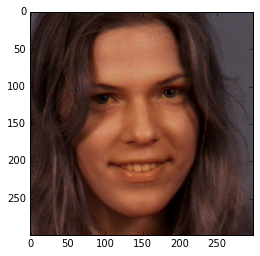

In [32]:
from keras.preprocessing import image 

image = cv2.imread("./decompressed_dataset/a_test/jpg/i000qa-fn.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ima = create_sets.crop_picture(image, 299)
plt.imshow(ima[0])

img = np.array([ima[0]])
btl = incep.predict(img)
pred = model.predict(btl)
print(pred)

In [33]:

for i in range(0,151,2):
    cv2.circle(ima[0], (int(pred[0][i]),int(pred[0][i+1]) ), 2, (255, 0, 0), -1)

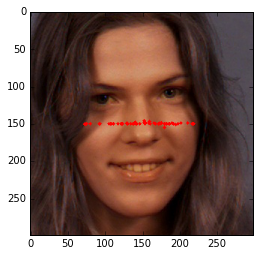

In [34]:
plt.imshow(ima[0])